In [1]:
import pandas as pd
import numpy as np

import plotly.express as px

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.stats as sc

from matplotlib import pyplot as plt

from random import Random

# Input Data

(array([  26.,  176.,  635., 1662., 2546., 2499., 1574.,  671.,  177.,
          34.]),
 array([1518.0445694 , 1790.82895054, 2063.61333168, 2336.39771282,
        2609.18209396, 2881.9664751 , 3154.75085623, 3427.53523737,
        3700.31961851, 3973.10399965, 4245.88838079]),
 <BarContainer object of 10 artists>)

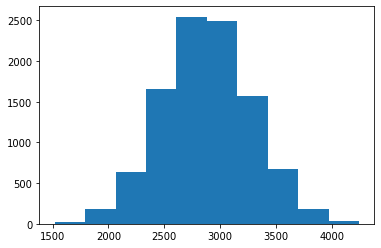

In [17]:
# Number of random samples
nsample = 10000
# Discount rate : WACC between 3 and 8%
r = np.random.uniform(0.03,0.08,nsample)
# Production period from Table A1.1 (IRENA 2020)
production_period = 25
# Electric power [W]
power_electric = 6e6
# Load Factor from (IRENA 2020) for the world
loadfactor = np.random.uniform(0.30,0.50,nsample)
# Total Installed cost ranges and weighted averages for onshore wind projects for Europe (IRENA 2020)
# [q5 - med - q95] = [2696 - 3394 - 5840] $2020 / kW
dollar_to_euro = 0.85
mu, sigma = 3394*dollar_to_euro, 400 # order of magnitude...
cost_construction_occ = np.random.normal(mu,sigma,nsample) * power_electric*1e-3
# Weighted-average O&M costs from IRENA 2020
# OFF SHORE = [70 - 129] $2020/kW/an
cost_fix_om = np.random.uniform(70,129,nsample) * dollar_to_euro * power_electric*1e-3

plt.hist(cost_construction_occ/( power_electric*1e-3))

# LCOE Calculation

In [13]:
df = pd.DataFrame(columns = ['dr','lt','ep','lf','cc','omc','lcoe','om_f','c_f'])

for s in list(range(nsample)):
    levelized_energy = 0
    levelized_cost_om = 0
    for t in list(range(production_period)):
        levelized_energy += power_electric * loadfactor[s] * 1e-6 * 365.25 * 24. / (1 + r[s])**(t+0.5)
        levelized_cost_om += cost_fix_om[s] / (1 + r[s])**(t+0.5)
    levelized_cost = cost_construction_occ[s] + levelized_cost_om
    om_frac = levelized_cost_om / levelized_cost
    cons_frac = cost_construction_occ[s] / levelized_cost
    lcoe = levelized_cost / levelized_energy

    to_append = [r[s],production_period,power_electric,loadfactor[s],cost_construction_occ[s],cost_fix_om[s],lcoe,om_frac,cons_frac]
    df.loc[len(df)] = to_append


# Plotting

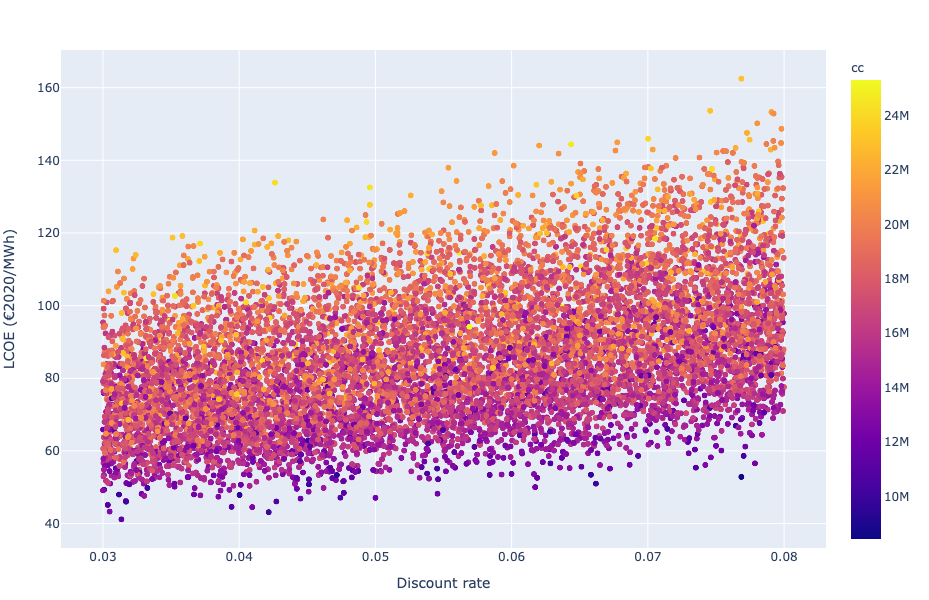

,dr,lt,ep,lf,cc,omc,lcoe,om_f,c_f
0,0.048556,25.0,6000000.0,0.336250,1.506198e+07,547563.041587,89.121734,0.347405,0.652595
1,0.071352,25.0,6000000.0,0.320669,2.002165e+07,655977.319828,138.510976,0.280798,0.719202
2,0.074236,25.0,6000000.0,0.494307,1.625389e+07,490957.089446,72.634982,0.259985,0.740015
3,0.042809,25.0,6000000.0,0.486942,1.915092e+07,473921.087859,66.778805,0.277101,0.722899
4,0.072810,25.0,6000000.0,0.468564,1.881735e+07,607922.444782,89.535120,0.275507,0.724493
...,...,...,...,...,...,...,...,...,...
9995,0.049599,25.0,6000000.0,0.386601,2.107855e+07,380888.554840,90.236163,0.207588,0.792412
9996,0.075107,25.0,6000000.0,0.487200,1.686419e+07,528028.398106,77.600313,0.265542,0.734458
9997,0.066202,25.0,6000000.0,0.419099,1.711524e+07,565081.569452,87.969609,0.291413,0.708587
9998,0.039477,25.0,6000000.0,0.435826,1.880946e+07,432198.225956,70.089046,0.269009,0.730991


In [15]:
fig = px.scatter(df, x="dr", y="lcoe", color="cc", log_x=False)
fig.update_xaxes(title="Discount rate")
fig.update_yaxes(title="LCOE (€2020/MWh)")
    
fig.update_layout(width=800,height=600,margin=dict(l=50,r=50,b=30,t=50))

fig.show()
df